Smith eng - ita DEBUG

In [9]:
import os
import csv
import matplotlib.pyplot as plt
import pickle
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from gensim.models import KeyedVectors
import copy
import numpy as np

Display loss

In [10]:
def plot_progress(output_folder):
    # Plot learning curve
    loss_fn = os.path.join(output_folder, 'train_mod', 'loss_output.csv')
    data_x = []
    data_y = []

    with open(loss_fn) as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',')
        for row in spamreader:
            data_x.append(int(row[0]))
            data_y.append(float(row[1]))

    print('max avg cos_sim: {0} at {1}'.format(max(data_y), data_y.index(max(data_y))))
    plt.plot(data_x, data_y, c='r')
    plt.title('Learning curve')
    plt.xlabel('Epochs')
    plt.ylabel('Avg sims')
    plt.grid()
    plt.show()

    # Plot precision curves
    def append_precs(var, data):
        var[0].append(data[1][0])
        var[1].append(data[1][1])
        var[2].append(data[1][2])

    colors = ['b', 'g', 'y']
    prec_nbs = [1, 5, 10]
    prec_en_it = [[], [], []]
    prec_it_en = [[], [], []]
    prec_fn = os.path.join(output_folder, 'train_mod', 'precision_output')
    with open(prec_fn, 'rb') as picklefile:
        precs = pickle.load(picklefile)
    for i, ls in enumerate(precs):
        en_it = ls[0]
        it_en = ls[1]
        append_precs(prec_en_it, en_it)
        append_precs(prec_it_en, it_en)

    nb = len(prec_en_it)
    plt.title('Precision en-it')
    plt.xlabel('Epochs')
    plt.ylabel('Precision')
    plt.grid()
    for i in range(nb):
        plt.plot(data_x, prec_en_it[i], c=colors[i], label='n={}'.format(prec_nbs[i]))
        print('max prec {0}: {1} at {2}'
              .format(prec_nbs[i], max(prec_en_it[i]), prec_en_it[i].index(max(prec_en_it[i]))))
    plt.legend()
    plt.show()
    plt.title('Precision it-en')
    plt.xlabel('Epochs')
    plt.ylabel('Precision')
    plt.grid()
    for i in range(nb):
        plt.plot(data_x, prec_it_en[i], c=colors[i], label='n={}'.format(prec_nbs[i]))
        print('max prec {0}: {1} at {2}'
              .format(prec_nbs[i], max(prec_it_en[i]), prec_it_en[i].index(max(prec_it_en[i]))))
    plt.legend()
    plt.show()

### Precision calculation strategy 0 (words from training, search among training)

test # 1  
100 epochs, without SVD  

max avg cos_sim: 0.966218 at 99


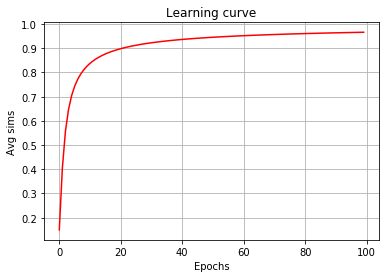

max prec 1: 0.18986013986013986 at 99
max prec 5: 0.40034965034965037 at 99
max prec 10: 0.4926573426573427 at 99


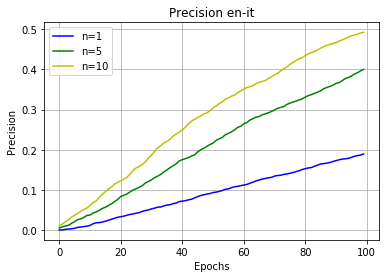

max prec 1: 0.15675022651766837 at 99
max prec 5: 0.3183328299607369 at 99
max prec 10: 0.4035034732709151 at 99


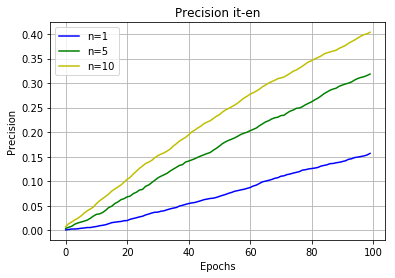

In [11]:
output_folder = '/home/eszti/projects/dipterv/panlex/output_permanent/20180116_1449_58'
plot_progress(output_folder=output_folder)

test # 2  
100 epochs, with SVD on every 10th epoch  

max avg cos_sim: 0.996875 at 9


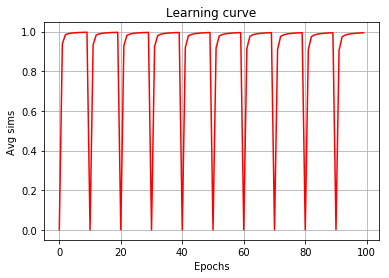

max prec 1: 0.8199300699300699 at 9
max prec 5: 0.9192307692307692 at 9
max prec 10: 0.943006993006993 at 9


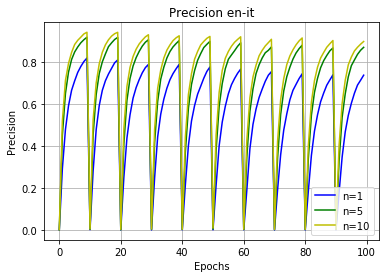

max prec 1: 0.854122621564482 at 9
max prec 5: 0.93083660525521 at 9
max prec 10: 0.9453337360314105 at 9


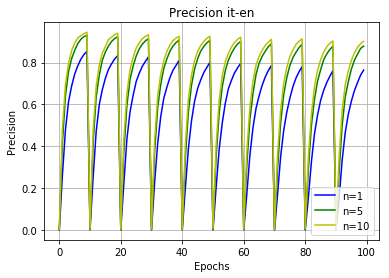

In [12]:
output_folder = '/home/eszti/projects/dipterv/panlex/output_permanent/20180116_1545_35'
plot_progress(output_folder=output_folder)

### Precision calculation strategy 1 (words from training, search in all = first 10 000 words)

test # 3  
100 epochs, without SVD  

max avg cos_sim: 0.966376 at 99


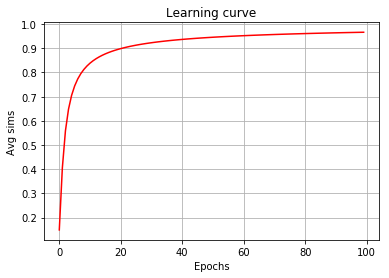

max prec 1: 0.18041958041958042 at 99
max prec 5: 0.3248251748251748 at 99
max prec 10: 0.39195804195804196 at 99


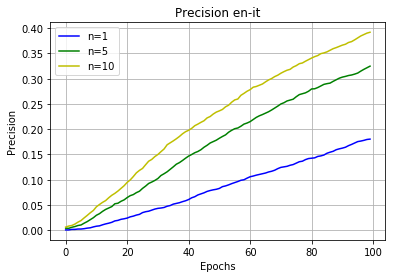

max prec 1: 0.13500453035336757 at 99
max prec 5: 0.26094835397160976 at 99
max prec 10: 0.334340078526125 at 99


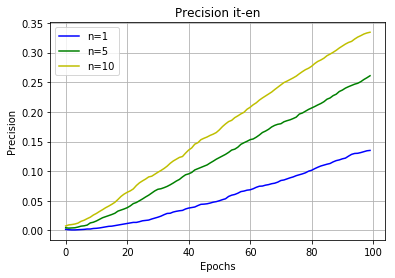

In [13]:
output_folder = '/home/eszti/projects/dipterv/panlex/output_permanent/20180117_1338_36'
plot_progress(output_folder=output_folder)

test # 4  
100 epochs, with SVD on every 10th epoch  

max avg cos_sim: 0.996871 at 9


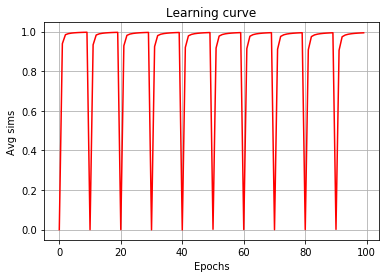

max prec 1: 0.7916083916083916 at 9
max prec 5: 0.906993006993007 at 9
max prec 10: 0.9300699300699301 at 9


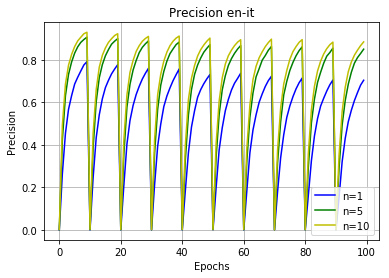

max prec 1: 0.8172757475083057 at 9
max prec 5: 0.920265780730897 at 9
max prec 10: 0.9368770764119602 at 9


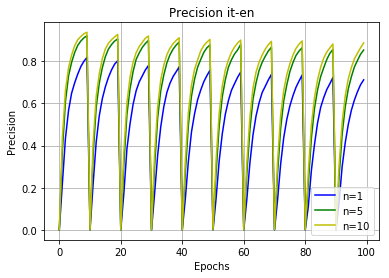

In [14]:
output_folder = '/home/eszti/projects/dipterv/panlex/output_permanent/20180117_1520_56'
plot_progress(output_folder=output_folder)

### Precision calculation strategy 2 (words from test, search among test)

test # 5  
100 epochs, without SVD 

max avg cos_sim: 0.966325 at 99


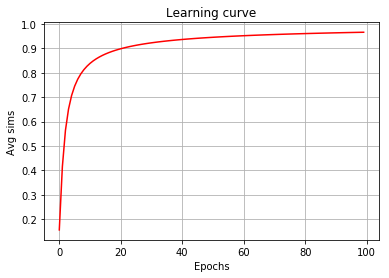

max prec 1: 0.23668639053254437 at 97
max prec 5: 0.44970414201183434 at 99
max prec 10: 0.5562130177514792 at 96


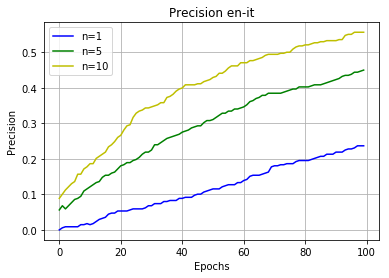

max prec 1: 0.21479713603818615 at 98
max prec 5: 0.4486873508353222 at 98
max prec 10: 0.5584725536992841 at 99


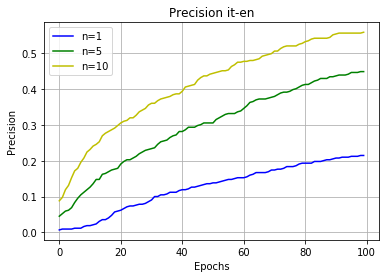

In [18]:
output_folder = '/home/eszti/projects/dipterv/panlex/output_permanent/20180117_1645_21'
plot_progress(output_folder=output_folder)

test # 6  
100 epochs, with SVD on every 10th epoch  

max avg cos_sim: 0.996875 at 9


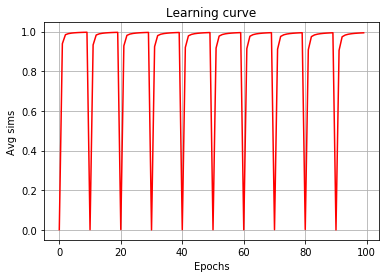

max prec 1: 0.742603550295858 at 9
max prec 5: 0.8461538461538461 at 19
max prec 10: 0.8816568047337278 at 9


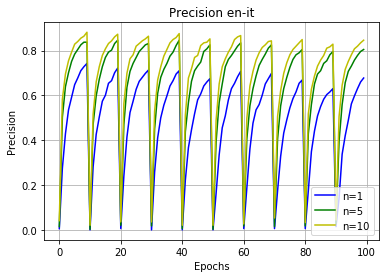

max prec 1: 0.6921241050119332 at 9
max prec 5: 0.8281622911694511 at 9
max prec 10: 0.8735083532219571 at 19


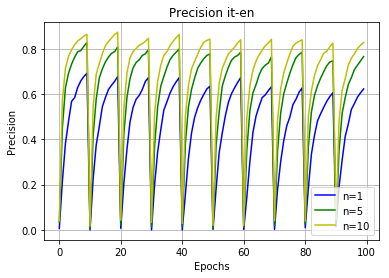

In [19]:
output_folder = '/home/eszti/projects/dipterv/panlex/output_permanent/20180117_1716_31'
plot_progress(output_folder=output_folder)

### Precision calculation strategy 3 (words from test, search in all = first 10 000 words)

test # 7  
100 epochs, without SVD

max avg cos_sim: 0.966353 at 99


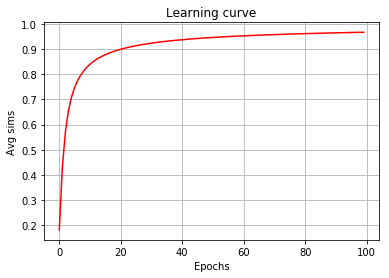

max prec 1: 0.10355029585798817 at 97
max prec 5: 0.1834319526627219 at 96
max prec 10: 0.23964497041420119 at 98


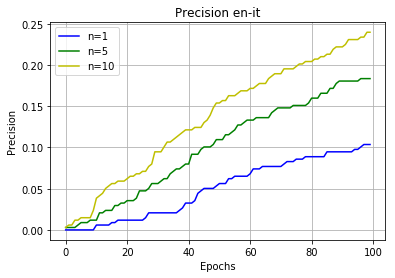

max prec 1: 0.05489260143198091 at 93
max prec 5: 0.13842482100238662 at 99
max prec 10: 0.19331742243436753 at 99


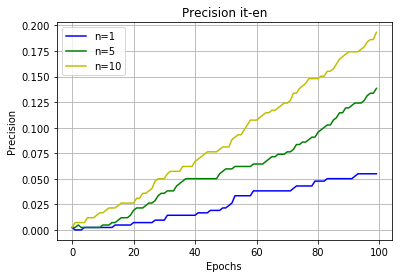

In [20]:
output_folder = '/home/eszti/projects/dipterv/panlex/output_permanent/20180117_1757_13'
plot_progress(output_folder=output_folder)

test # 8  
100 epochs, with SVD on every 10th epoch

max avg cos_sim: 0.996873 at 9


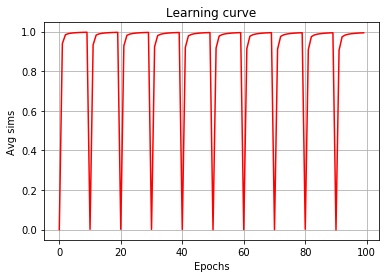

max prec 1: 0.5 at 29
max prec 5: 0.7071005917159763 at 9
max prec 10: 0.7692307692307693 at 9


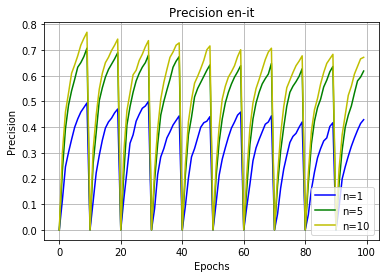

max prec 1: 0.45346062052505964 at 9
max prec 5: 0.6348448687350835 at 9
max prec 10: 0.6921241050119332 at 9


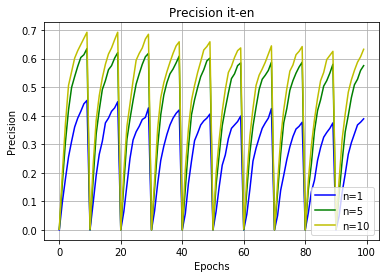

In [21]:
output_folder = '/home/eszti/projects/dipterv/panlex/output_permanent/20180117_1815_54'
plot_progress(output_folder=output_folder)

### Check precision  
strange behaviour

In [16]:
emb_fn = '/mnt/permanent/Language/Multi/FB/wiki.en/wiki.en.vec'
limit = 10000
model = KeyedVectors.load_word2vec_format(emb_fn, binary=False, limit=limit)

In [17]:
nbs = [1, 50, 99]
T_fn = os.path.join(output_folder, 'train_mod', 'T_{}.pickle'.format(nbs[0]))
with open(T_fn, 'rb') as f:
    T = pickle.load(f)

model.most_similar('dog')
model['dog'].shape
model['dog'][0]

model_T = copy.deepcopy(model)
W = copy.deepcopy(model_T.syn0)
model_T.syn0 = np.dot(W, T[0])
model_T.most_similar('dog')
model_T['dog'].shape
model_T['dog'][0]

[('dogs', 0.8104336857795715),
 ('rabbit', 0.649113118648529),
 ('cat', 0.6380517482757568),
 ('pig', 0.6210767030715942),
 ('cow', 0.5820291042327881),
 ('pet', 0.5802521705627441),
 ('breed', 0.571986198425293),
 ('animal', 0.5635776519775391),
 ('shepherd', 0.5540464520454407),
 ('sheep', 0.5497960448265076)]

(300,)

0.19083001

[('dogs', 0.8104336857795715),
 ('rabbit', 0.649113118648529),
 ('cat', 0.6380517482757568),
 ('pig', 0.6210767030715942),
 ('cow', 0.5820291042327881),
 ('pet', 0.5802521705627441),
 ('breed', 0.571986198425293),
 ('animal', 0.5635776519775391),
 ('shepherd', 0.5540464520454407),
 ('sheep', 0.5497960448265076)]

(300,)

0.88289303